In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# EDA

In [2]:
# load data
data = pd.read_csv('../input/student-performance-dataset/ultimate_student_productivity_dataset_5000.csv')

In [3]:
data.head(5)

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [4]:
data.shape

(5000, 21)

In [5]:
data.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'study_hours',
       'self_study_hours', 'online_classes_hours', 'social_media_hours',
       'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'internet_quality', 'mental_health_score', 'focus_index',
       'burnout_level', 'productivity_score', 'exam_score'],
      dtype='object')

In [6]:
data.describe()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


In [7]:
data.describe(include='object')

,gender,academic_level,internet_quality
count,5000,5000,5000
unique,3,3,3
top,Male,Postgraduate,Good
freq,1719,1687,1722


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [9]:
data.isnull().sum()

student_id              0
age                     0
gender                  0
academic_level          0
study_hours             0
self_study_hours        0
online_classes_hours    0
social_media_hours      0
gaming_hours            0
sleep_hours             0
screen_time_hours       0
exercise_minutes        0
caffeine_intake_mg      0
part_time_job           0
upcoming_deadline       0
internet_quality        0
mental_health_score     0
focus_index             0
burnout_level           0
productivity_score      0
exam_score              0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['gender'].value_counts()

gender
Male      1719
Other     1651
Female    1630
Name: count, dtype: int64

In [12]:
data['academic_level'].value_counts()

academic_level
Postgraduate     1687
High School      1672
Undergraduate    1641
Name: count, dtype: int64

In [13]:
data['internet_quality'].value_counts()

internet_quality
Good       1722
Poor       1640
Average    1638
Name: count, dtype: int64

# Data visualization

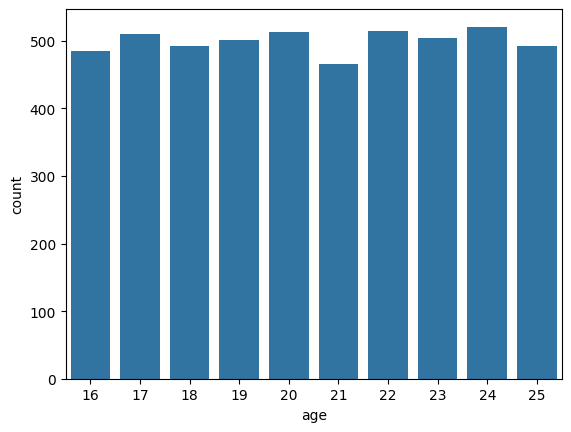

In [14]:
sns.countplot(x=data['age'])
plt.show()

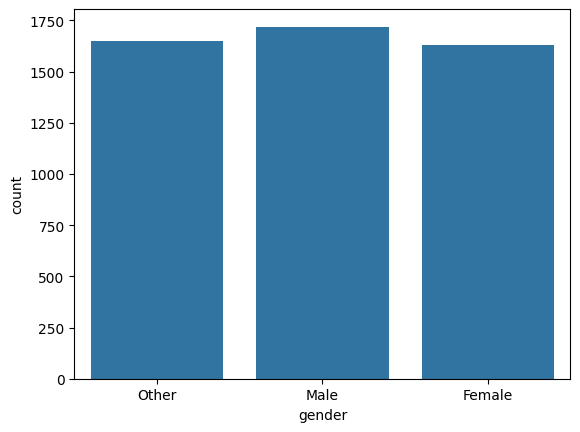

In [15]:
sns.countplot(x=data['gender'])
plt.show()

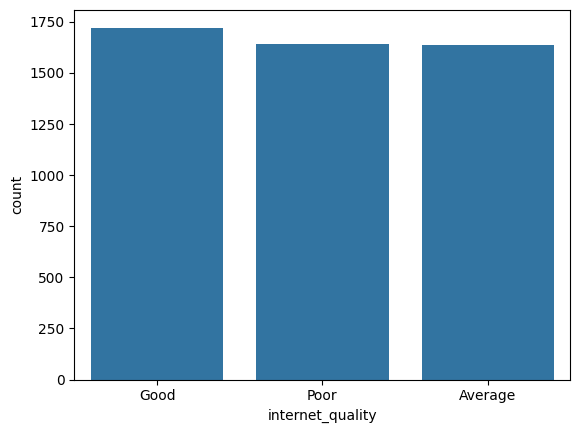

In [16]:
sns.countplot(x=data['internet_quality'])
plt.show()

<Axes: xlabel='study_hours', ylabel='Count'>

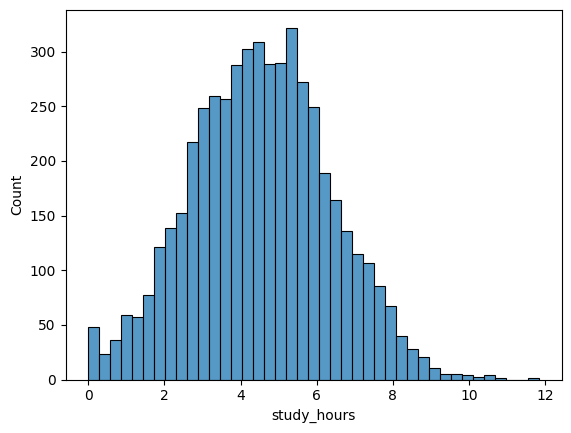

In [17]:
sns.histplot(data, x='study_hours')

<Axes: xlabel='exam_score', ylabel='Count'>

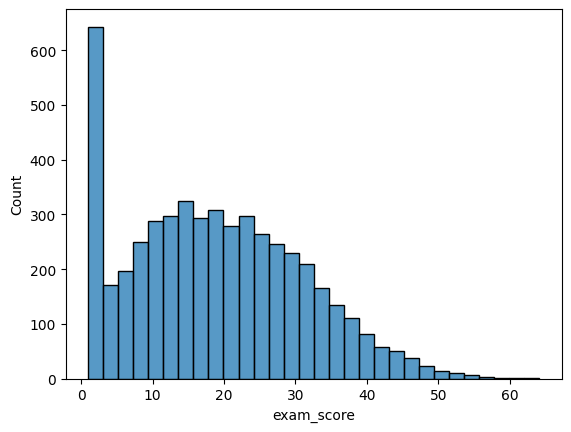

In [18]:
sns.histplot(data, x='exam_score')

In [19]:
col = ['gender', 'academic_level', 'internet_quality']
data = pd.get_dummies(data, columns=col, drop_first=False)

In [20]:
bool_col = data.select_dtypes(include='bool').columns
data[bool_col] = data[bool_col].astype('int')

In [21]:
data.head(5)

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,...,exam_score,gender_Female,gender_Male,gender_Other,academic_level_High School,academic_level_Postgraduate,academic_level_Undergraduate,internet_quality_Average,internet_quality_Good,internet_quality_Poor
0,1,18,7.64,1.56,2.20,3.05,2.19,6.52,6.47,81,...,50.16,0,0,1,1,0,0,0,1,0
1,2,18,2.21,2.22,2.10,1.65,2.55,5.97,6.05,111,...,1.00,0,0,1,1,0,0,0,1,0
2,3,22,3.45,0.00,0.29,1.34,2.08,8.39,7.62,68,...,18.30,0,1,0,1,0,0,0,1,0
3,4,17,5.75,2.08,3.01,2.27,2.20,6.31,11.67,113,...,9.37,0,0,1,1,0,0,0,0,1
4,5,19,6.83,1.72,3.33,2.65,0.70,8.01,10.02,121,...,27.81,0,0,1,1,0,0,0,1,0


In [22]:
data.dtypes

student_id                        int64
age                               int64
study_hours                     float64
self_study_hours                float64
online_classes_hours            float64
social_media_hours              float64
gaming_hours                    float64
sleep_hours                     float64
screen_time_hours               float64
exercise_minutes                  int64
caffeine_intake_mg                int64
part_time_job                     int64
upcoming_deadline                 int64
mental_health_score               int64
focus_index                     float64
burnout_level                   float64
productivity_score              float64
exam_score                      float64
gender_Female                     int64
gender_Male                       int64
gender_Other                      int64
academic_level_High School        int64
academic_level_Postgraduate       int64
academic_level_Undergraduate      int64
internet_quality_Average          int64


In [23]:
data['all_study_hours']  = data['study_hours'] + data['self_study_hours'] + data['online_classes_hours']
data = data.drop(['study_hours', 'self_study_hours', 'online_classes_hours'], axis = 1)

In [24]:
data['all_wasted_hours'] = data['social_media_hours'] + data['gaming_hours'] + data['screen_time_hours'] + data['sleep_hours']
data = data.drop(['social_media_hours', 'gaming_hours', 'screen_time_hours', 'sleep_hours'], axis=1)

In [25]:
data.head(5)

,student_id,age,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,...,gender_Male,gender_Other,academic_level_High School,academic_level_Postgraduate,academic_level_Undergraduate,internet_quality_Average,internet_quality_Good,internet_quality_Poor,all_study_hours,all_wasted_hours
0,1,18,81,38,1,0,10,43.05,31.77,73.65,...,0,1,1,0,0,0,1,0,11.40,18.23
1,2,18,111,339,0,0,3,15.92,37.00,13.70,...,0,1,1,0,0,0,1,0,6.53,16.22
2,3,22,68,266,0,1,8,27.39,34.37,45.15,...,1,0,1,0,0,0,1,0,3.74,19.43
3,4,17,113,480,1,1,3,22.31,77.31,20.92,...,0,1,1,0,0,0,0,1,10.84,22.45
4,5,19,121,24,1,0,8,38.11,39.53,59.23,...,0,1,1,0,0,0,1,0,11.88,21.38


In [26]:
corr = data.corr()['exam_score'].sort_values(ascending=False)
print('Correlation: ')
print(corr)

Correlation: 
exam_score                      1.000000
productivity_score              0.886401
focus_index                     0.749879
mental_health_score             0.546547
all_study_hours                 0.436046
exercise_minutes                0.040724
gender_Female                   0.012671
internet_quality_Poor           0.012009
academic_level_Undergraduate    0.008637
gender_Male                     0.006888
internet_quality_Average        0.006613
academic_level_High School      0.000363
academic_level_Postgraduate    -0.008940
age                            -0.009047
internet_quality_Good          -0.018396
gender_Other                   -0.019586
student_id                     -0.029406
caffeine_intake_mg             -0.075586
all_wasted_hours               -0.082890
part_time_job                  -0.149807
upcoming_deadline              -0.215342
burnout_level                  -0.407808
Name: exam_score, dtype: float64


In [27]:
X = data.drop(['student_id', 'exam_score'], axis=1)
y = data['exam_score']

# Data splitting

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [29]:
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (3500, 20)
y_train.shape = (3500,)
X_test.shape = (1500, 20)
y_test.shape = (1500,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML models

In [31]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_lin = lin_model.predict(X_test)

In [33]:
print(f'MAE for linear regression = {mean_absolute_error(y_test, y_pred_lin)}')
print(f'MSE for linear regression = {mean_squared_error(y_test, y_pred_lin)}')
print(f'R2 score for linear regression = {r2_score(y_test, y_pred_lin)}')

MAE for linear regression = 3.9971025989701423
MSE for linear regression = 25.488373970098795
R2 score for linear regression = 0.8199740236505588


In [34]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [35]:
y_pred_lasso = lasso_model.predict(X_test)

In [36]:
print(f'MAE for lasso = {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'MSE for lasso = {mean_squared_error(y_test, y_pred_lasso)}')
print(f'R2 score for lasso = {r2_score(y_test, y_pred_lasso)}')

MAE for lasso = 3.989471909049645
MSE for lasso = 25.431491983418425
R2 score for lasso = 0.8203757846730879


In [37]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf', C=5)
svm_model.fit(X_train, y_train)

SVR(C=5)

In [38]:
y_pred_svm = svm_model.predict(X_test)

In [39]:
print(f'MAE for svm = {mean_absolute_error(y_test, y_pred_svm)}')
print(f'MSE for svm = {mean_squared_error(y_test, y_pred_svm)}')
print(f'R2 score for svm = {r2_score(y_test, y_pred_svm)}')

MAE for svm = 4.038747022091767
MSE for svm = 26.350582381866204
R2 score for svm = 0.8138841918187119


In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=100, weights='distance')
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

In [41]:
y_pred_knn = knn_model.predict(X_test)

In [42]:
print(f'MAE for knn = {mean_absolute_error(y_test, y_pred_knn)}')
print(f'MSE for knn = {mean_squared_error(y_test, y_pred_knn)}')
print(f'R2 score for knn = {r2_score(y_test, y_pred_knn)}')

MAE for knn = 5.601925018382073
MSE for knn = 46.18742820362383
R2 score for knn = 0.6737753115525689


In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [44]:
y_pred_dt = dt_model.predict(X_test)

In [45]:
print(f'MAE for decision tree = {mean_absolute_error(y_test, y_pred_dt)}')
print(f'MSE for decision tree = {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 score for decision tree = {r2_score(y_test, y_pred_dt)}')

MAE for decision tree = 4.864495006051224
MSE for decision tree = 39.68847882836245
R2 score for decision tree = 0.7196777966581138


In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=30, max_depth=7)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=30)

In [47]:
y_pred_rf = rf_model.predict(X_test)

In [48]:
print(f'MAE for random forest = {mean_absolute_error(y_test, y_pred_rf)}')
print(f'MSE for random forest = {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2 score for random forest = {r2_score(y_test, y_pred_rf)}')

MAE for random forest = 3.994494112473441
MSE for random forest = 25.710420702556814
R2 score for random forest = 0.818405693718926


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=5)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=40)

In [50]:
y_pred_gb = gb_model.predict(X_test)

In [51]:
print(f'MAE for gradient boosting = {mean_absolute_error(y_test, y_pred_gb)}')
print(f'MSE for gradient boosting = {mean_squared_error(y_test, y_pred_gb)}')
print(f'R2 score for gradient boosting = {r2_score(y_test, y_pred_gb)}')

MAE for gradient boosting = 3.9645954500618488
MSE for gradient boosting = 25.275605053869555
R2 score for gradient boosting = 0.8214768237870413


In [52]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(n_estimators=60, max_depth=3, learning_rate=0.1)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=60,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
y_pred_xgboost = xgboost_model.predict(X_test)

In [54]:
print(f'MAE for xgboost = {mean_absolute_error(y_test, y_pred_xgboost)}')
print(f'MSE for xgboost = {mean_squared_error(y_test, y_pred_xgboost)}')
print(f'R2 score for xgboost = {r2_score(y_test, y_pred_xgboost)}')

MAE for xgboost = 3.920472553182443
MSE for xgboost = 24.739229231429828
R2 score for xgboost = 0.8252652797018136


# Comparison between models

In [55]:
data_df = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Lasso',
        'SVR',
        'Decision Tree',
        'Random Forest',
        'KNN',
        'Gradient Boosting',
        'xgboost'
    ],
    'R2_score': [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_svm),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_xgboost)
    ]
}).sort_values(by='R2_score', ascending=False)

In [56]:
data_df

,Model,R2_score
7,xgboost,0.825265
6,Gradient Boosting,0.821477
1,Lasso,0.820376
0,Linear Regression,0.819974
4,Random Forest,0.818406
2,SVR,0.813884
3,Decision Tree,0.719678
5,KNN,0.673775


# Cross validation

In [57]:
from sklearn.model_selection import cross_val_score, KFold

# 5-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=5),
    "XGBoost": XGBRegressor(n_estimators=60, max_depth=3, learning_rate=0.1),
    "SVR": SVR(kernel='rbf', C=5),
    "KNN": KNeighborsRegressor(n_neighbors=100, weights='distance'),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=7)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print(name)
    print("R2 scores:", scores)
    print("Average R2:", np.mean(scores))
    print("---------------")

Linear Regression
R2 scores: [0.81664934 0.81885255 0.83720311 0.84344102 0.84551548]
Average R2: 0.8323323010401239
---------------
Lasso
R2 scores: [0.8174688  0.81884892 0.83880693 0.84436675 0.84511997]
Average R2: 0.8329222725166353
---------------
Decision Tree
R2 scores: [0.70630293 0.69987125 0.76666749 0.74940852 0.75414629]
Average R2: 0.7352792961167122
---------------
Gradient Boosting
R2 scores: [0.81808927 0.82373735 0.84234583 0.84602192 0.8465252 ]
Average R2: 0.8353439137455052
---------------
XGBoost
R2 scores: [0.82151603 0.82288774 0.84620844 0.85055685 0.85191355]
Average R2: 0.83861652204889
---------------
SVR
R2 scores: [0.81427888 0.81822714 0.83385901 0.84271211 0.84268293]
Average R2: 0.8303520124736566
---------------
KNN
R2 scores: [0.64837931 0.66334675 0.66032715 0.67547404 0.65616151]
Average R2: 0.6607377525539085
---------------
Random Forest
R2 scores: [0.81660726 0.81940186 0.84681616 0.84856063 0.84722298]
Average R2: 0.835721777741359
-------------

# The best model is XGBoost with R2_score(without CV is 0.825265 and with using CV is 0.838616)